In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def true_function(x):
    return 0.5 * x + np.sin(x)
def run_all(model_class, x):
    return np.array([f(x) for f in model_class])
def run(model_class, x, w):
    return (w.T @ run_all(model_class, x))[0]

In [4]:
r = 10

rng = np.random.RandomState(0)
x = rng.rand(100) * r * 2 - r
y = true_function(x) + rng.randn(x.shape[0]) * 0.5

def fit(model_class):
    w, *_ = np.linalg.lstsq(run_all(model_class, x).T, y[:,None], rcond=None)
    return w

In [5]:
def plot(ax, model_class, name):
    w = fit(model_class)
    x_show = np.linspace(-r * 1.2, r * 1.2, 1000)
    y_show = run(model_class, x_show, w)
    ax.scatter(x, y, color="black", marker=".", alpha=0.2)
    ax.plot(x_show, y_show, color="black")
    ax.set_title(name)
    ax.set_ylim(-7, 7)

In [6]:
def sin_model_class(k):
    models = [lambda x: np.ones_like(x), lambda x: x]
    for freq in range(1, 1 + k):
        models.append(lambda x, freq=freq: np.sin(x * freq))
    return models

def poly_model_class(k):
    models = [lambda x: np.ones_like(x)]
    for i in range(1, 1 + k):
        models.append(lambda x, i=i: x ** i)
    return models

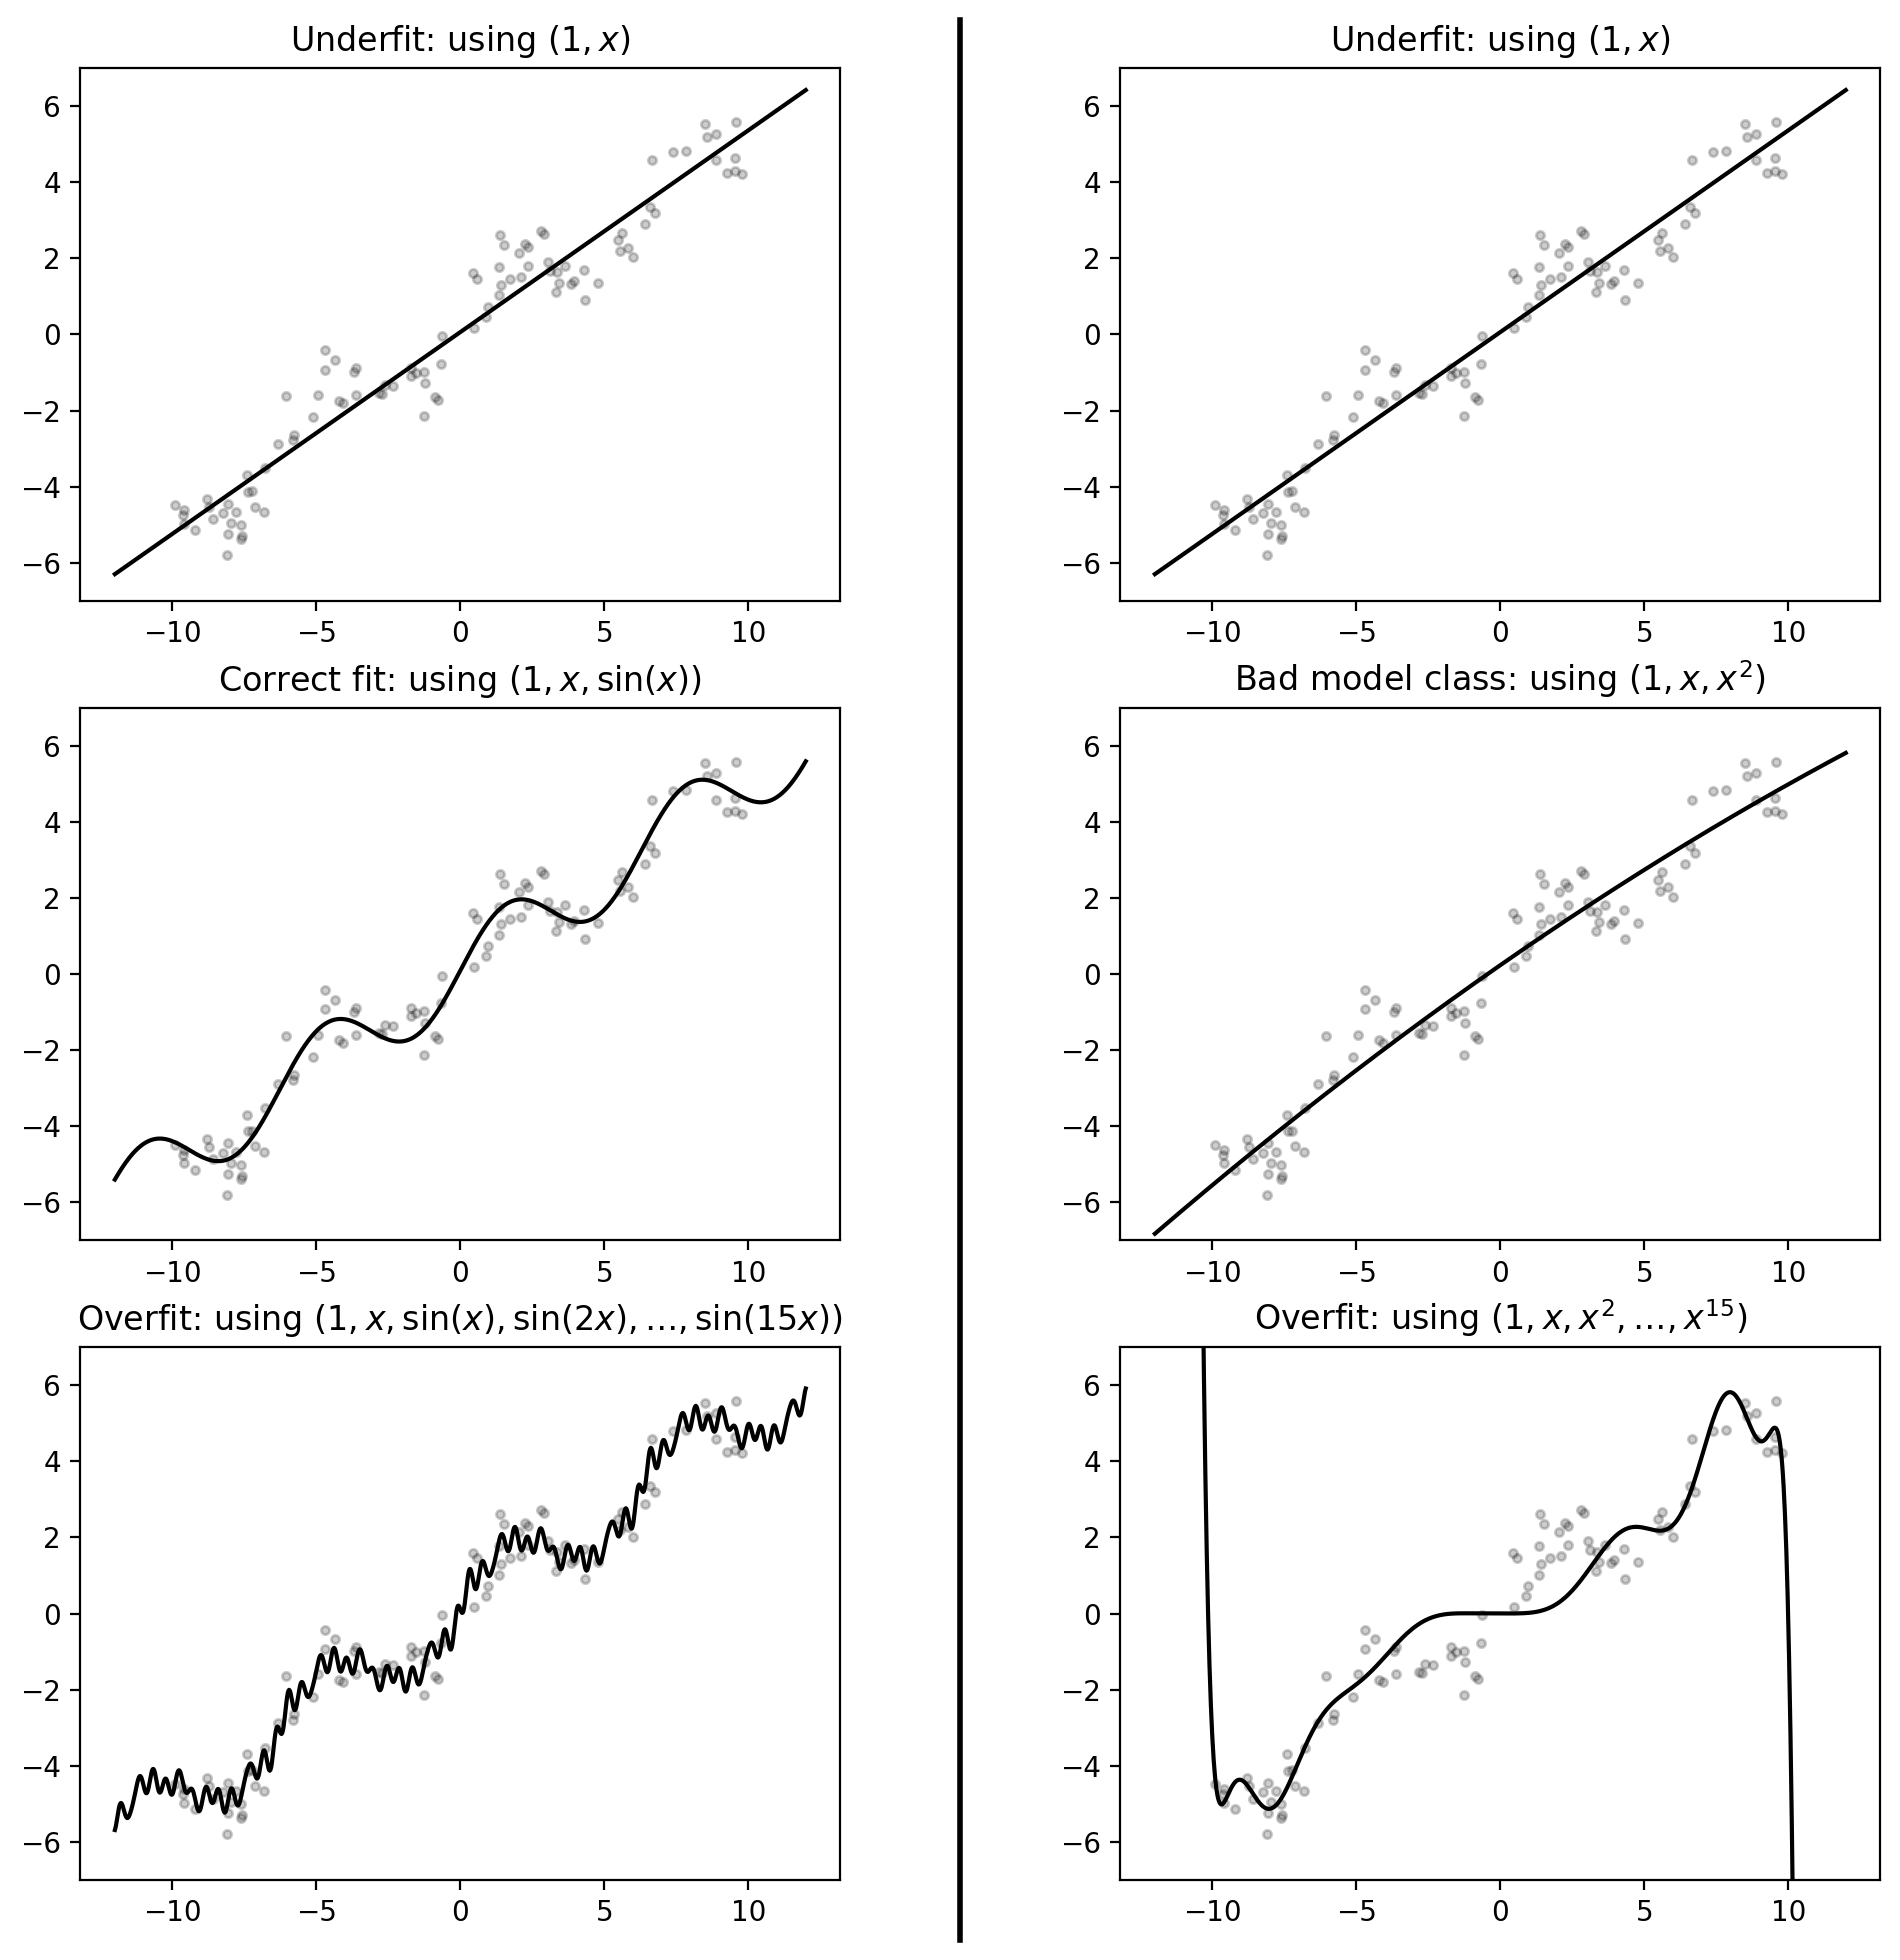

In [7]:
fig = plt.figure(figsize=(10, 12), facecolor="white", dpi=200)
axs_sin = fig.subplots(3, 1, gridspec_kw=dict(left=0.05, right=0.43, wspace=0.4))
axs_poly = fig.subplots(3, 1, gridspec_kw=dict(left=0.57, right=0.95, wspace=0.4))

plot(axs_sin[0], sin_model_class(0), "Underfit: using $(1, x)$")
plot(axs_sin[1], sin_model_class(1), f"Correct fit: using $(1, x, \sin(x))$")
plot(
    axs_sin[2],
    sin_model_class(16),
    f"Overfit: using $(1, x, \sin(x), \sin(2x), \ldots, \sin(15x))$",
)

plot(axs_poly[0], poly_model_class(1), "Underfit: using $(1, x)$")
plot(axs_poly[1], poly_model_class(2), "Bad model class: using $(1, x, x^2)$")
plot(axs_poly[2], poly_model_class(15), "Overfit: using $(1, x, x^2, \ldots, x^{15})$")

line = plt.Line2D((0.49, 0.49), (0.1, 0.9), color="k", linewidth=2)
fig.add_artist(line)
plt.show()